In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set plots size
sns.set(rc={'figure.figsize':(13, 4)})

In [4]:
# Get NBA data
df = pd.read_csv('all_seasons.csv')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [5]:
# Remove useless column
df.drop(columns='Unnamed: 0', inplace=True)

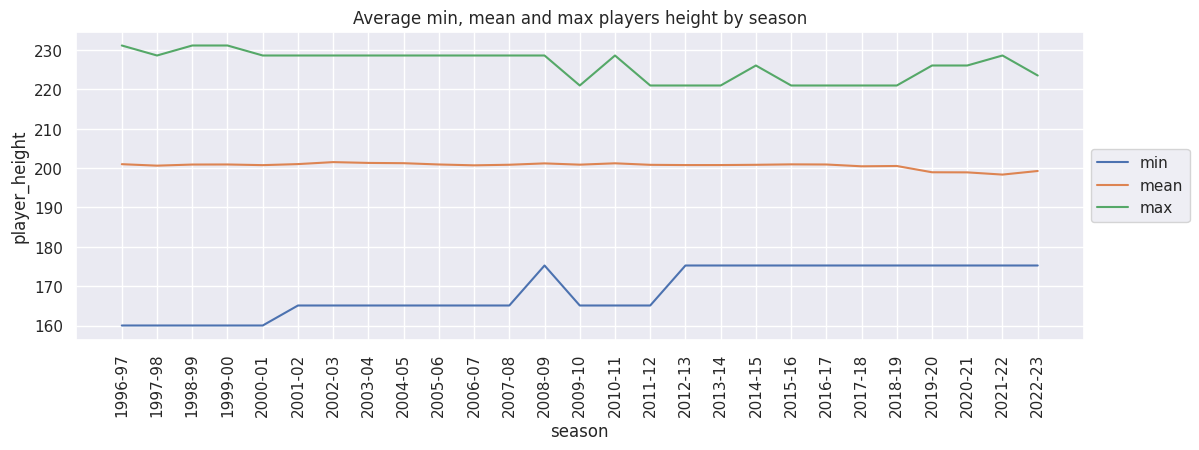

In [67]:
plt.xticks(rotation=90)
plt.title('Average min, mean and max players height by season')

# Evolution of height
player_height_by_season = df.groupby('season')['player_height']
sns.lineplot(player_height_by_season.min(), label='min')
sns.lineplot(player_height_by_season.mean(), label='mean')
sns.lineplot(player_height_by_season.max(), label='max')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: title={'center': 'Min players height by season'}, xlabel='season', ylabel='player_height'>

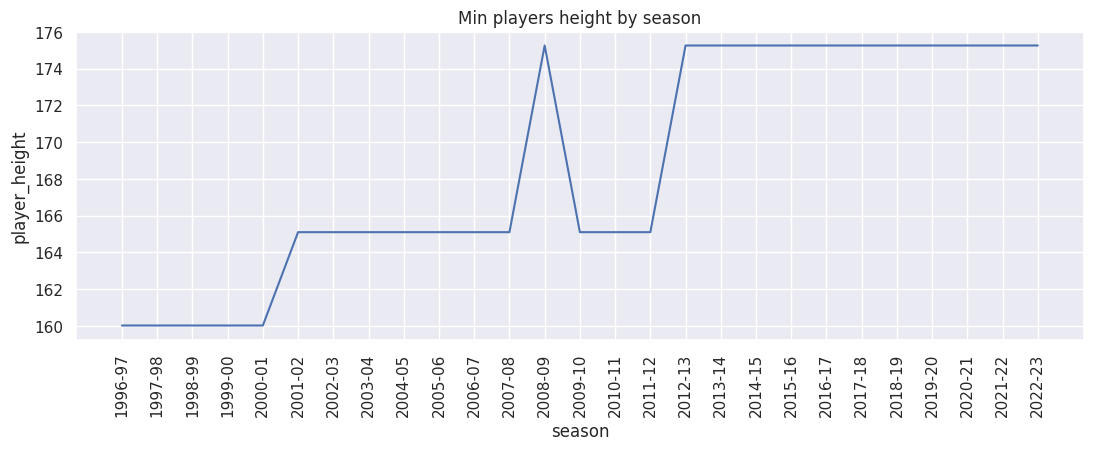

In [7]:
plt.xticks(rotation=90)
plt.title('Min players height by season')
sns.lineplot(player_height_by_season.min())

<Axes: title={'center': 'Mean players height by season'}, xlabel='season', ylabel='player_height'>

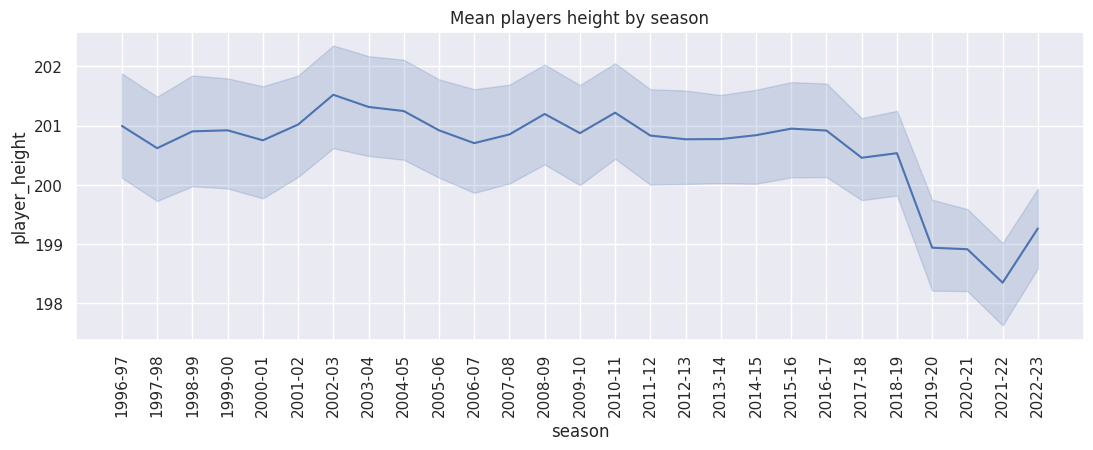

In [8]:
plt.xticks(rotation=90)
plt.title('Mean players height by season')
sns.lineplot(data=df, x='season', y='player_height')

<Axes: title={'center': 'Max players height by season'}, xlabel='season', ylabel='player_height'>

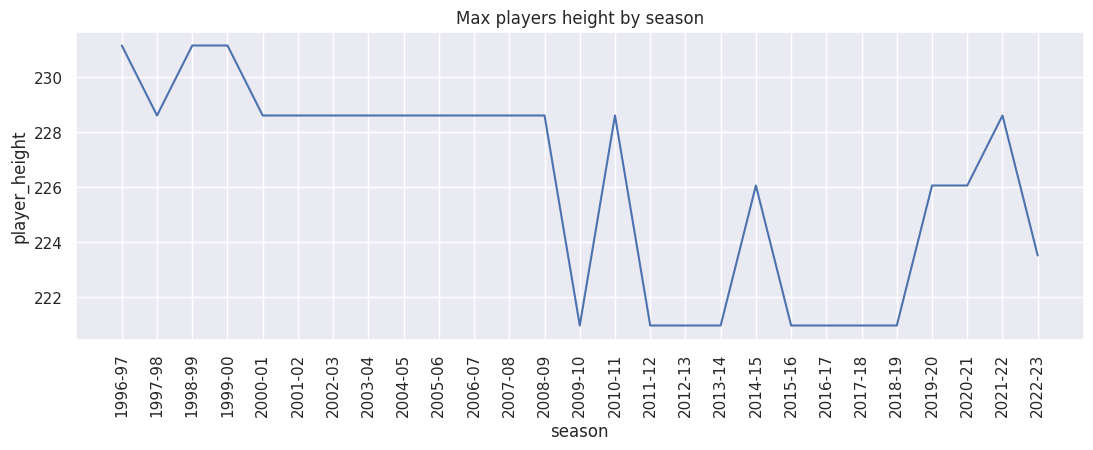

In [9]:
plt.xticks(rotation=90)
plt.title('Max players height by season')
sns.lineplot(player_height_by_season.max())

<Axes: title={'center': 'Evolution of shot precision by season'}, xlabel='season', ylabel='ts_pct'>

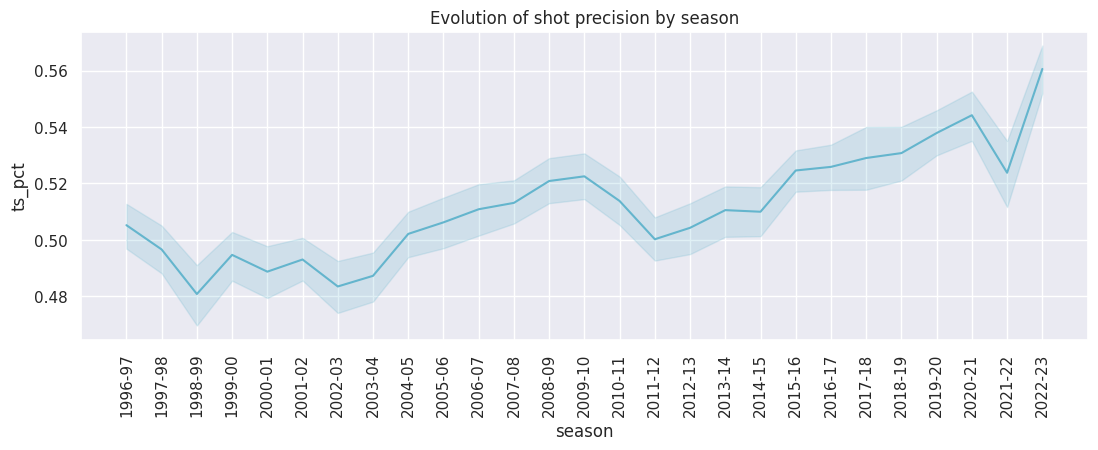

In [10]:
# Evolution of shot precision
plt.xticks(rotation=90)
plt.title('Evolution of shot precision by season')
sns.lineplot(data=df, x='season', y='ts_pct', color='c')

<Axes: title={'center': 'Evolution of players nationalities number'}, xlabel='season', ylabel='nb_country'>

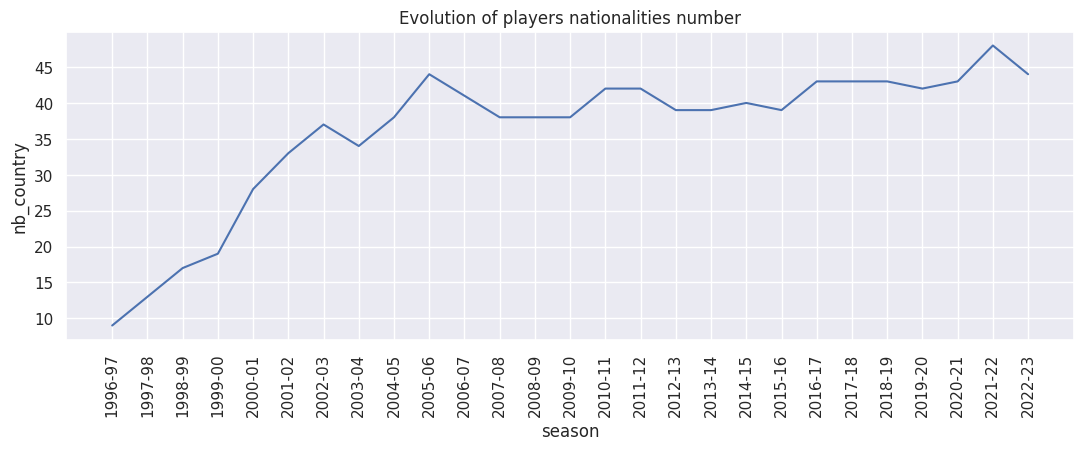

In [35]:
# Evolution of players nationalities number throughout the seasons
plt.xticks(rotation=90)
plt.title('Evolution of players nationalities number')

df_country = df.groupby('season')['country'].unique().reset_index()
df_country['nb_country'] = df_country['country'].str.len()

sns.lineplot(data=df_country, x='season', y='nb_country')

<Axes: title={'center': 'Overall most present nationality besides USA'}, xlabel='country', ylabel='count'>

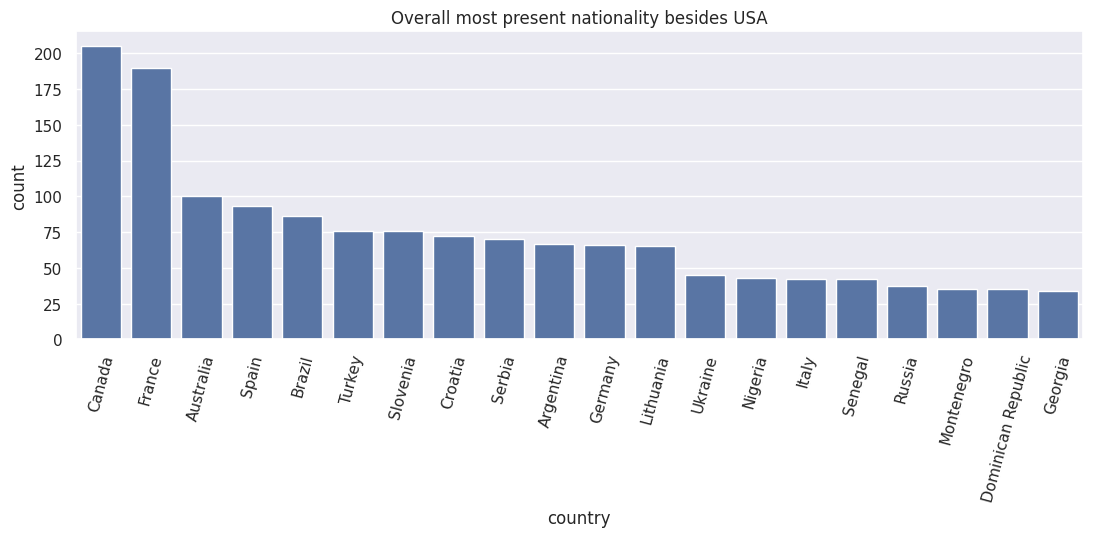

In [63]:
# Overall most present nationality
plt.xticks(rotation=75)
plt.title('Overall most present nationality besides USA')
df_most_country = df.country.value_counts().drop('USA').reset_index()[:20]
sns.barplot(data=df_most_country, x='country', y='count')
